<h1 style="text-align: center;">Fourier Series Approximation of a Square Wave</h1>
<p style="text-align: center;">Lab 8</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Use Fourier Series to approximate periodic time-domain signals.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Equations for **Task 1**.  
[ ] Printed output for **Task 1**.  
[ ] Plots for **Task 2**.  

![Square Wave](SquareWaveLab8.png)

### 3. Part 1
##### 3.1 Tasks   
Consider the square wave in the figure. Assume that $x(t)$ is a real-value function and can be represented by the Fourier series:  
$$x(t) = \frac{1}{2} a_0 + \displaystyle \sum_{k =1}^{\infty}a_kcos(k\omega_0t) + b_ksin(k\omega_0t)$$
Where,  
$$a_k = \frac{2}{T}\displaystyle \int_0^Tx(t)cos(k\omega_0t)dt,$$  
$$b_k = \frac{2}{T}\displaystyle \int_0^Tx(t)sin(k\omega_0t)dt,$$
and  
$$\omega_0 = \frac{2\pi}{T}.$$  

1. Input the expressions for $a_k$ and $b_k$ into Python. Use Python to solve for $a_0$, $a_1$, $b_1$, $b_2$, and $b_3$ and display a numerical value for each. 

In [3]:
#Insert all necessary imports here
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Insert all code for Part 1, Task 1 here

def a_k(k):
    """
    Calculates a_k for the Fourier series of a square wave
    
    Inputs: k - k-th harmonic to evaluate - int
            
    Outputs: a_k for given k - float
    """
    
    if k == 0:
        return 0
    else:
        return (2 / (k * np.pi)) * (np.sin(k * np.pi))

def b_k(k):
    """
    Calculates b_k for the Fourier series of a square wave
    
    Inputs: k - k-th harmonic to evaluate - int
            
    Outputs: b_k for given k - float
    """
    
    if k == 0:
        return 0
    else:
        return (2 / (k * np.pi)) * (1 - np.cos(k * np.pi))

a = np.zeros(2)
b = np.zeros(4)

# Calculate and print a coefficients from a0 to a1
for k in np.arange(2):
    a[k] = a_k(k)
    print(f"a{k} = {a[k]:.4f}")
    
# Calculate and print b coefficients from b1 to b3
for k in np.arange(1,4):
    b[k] = b_k(k)
    print(f"b{k} = {b[k]:.4f}")

a0 = 0.0000
a1 = 0.0000
b1 = 1.2732
b2 = 0.0000
b3 = 0.4244


2. For the square wave in the figure, plot the Fourier series approximation for $N = \left\{1, 3, 15, 50, 150, 1500\right\}$ for,  
$$x(t) = \frac{1}{2} a_0 + \displaystyle \sum_{k =1}^{N}a_kcos(k\omega_0t) + b_ksin(k\omega_0t).$$  
Set $T = 8$ s and plot the approximation time for $0\le t \le 20$ s using an appropriate step size. Format the plots into 2 figures, each having 3 vertical subplots.

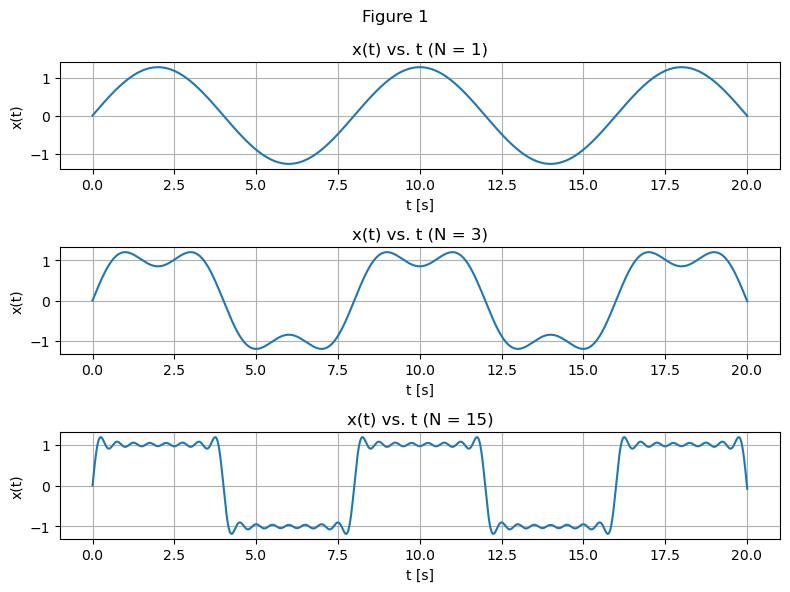

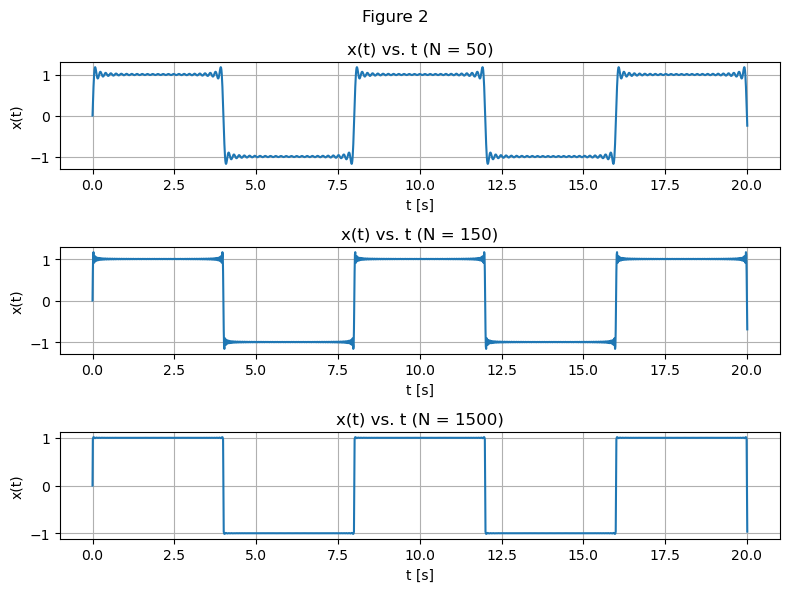

In [11]:
#Insert all code for Part 1, Task 2 here
def fourier_approx(N, T, t):
    """
    Calculates the Fourier series approximation of a square wave 
    for N terms over period T with time t
    
    Inputs: N - N number of terms - int
            T - time period in seconds - float
            t - time - vector
                   
    Outputs: Fourier approximation - float
    """
    
    omega_0 = 2 * np.pi / T
    approx = a_k(0) / 2 
    
    for k in np.arange(1, N+1):
        approx += a_k(k) * np.cos(k * omega_0 * t) + b_k(k) * np.sin(k * omega_0 * t)
    return approx

step = 1e-2
T = 8
N = [1, 3, 15, 50, 150, 1500]
t = np.arange(0, 20 + step, step)

# 2 Figures
for fig in np.arange(2):
    plt.figure(figsize=(8, 6))
    
    # Unique titles to distinguish figures
    plt.suptitle(f"Figure {fig + 1}")
    
    # 3 Subplots per figure
    for subplt in np.arange(3):
        
        # Index of N is:
        # subplot number (max of 2)
        # figure number (max of 1)
        N_index = subplt + (3 * fig)
        
        # Calculate approximation for current N
        x = fourier_approx(N[N_index], T, t)
        
        plt.subplot(3, 1, subplt + 1)
        plt.plot(t, x)
        plt.grid()
        plt.ylabel("x(t)")
        plt.xlabel("t [s]")
        plt.title(f"x(t) vs. t (N = {N[N_index]})")
        
    plt.tight_layout()   
    plt.show()


### 4. Questions
1. Is $x(t)$ an even or an odd function? Explain why.    
> $x(t)$ is an odd function given that $x(t) = -x(-t)$. This can be determined visually from SquareWaveLab8.png as the function is not symmetric about the y-axis. Were the wave offset by $\pm T/4$, causing either the positive or negative pulses to be centered at $t=0$, the function would be then be even.
2. Based on your results from **Task 1**, what do you expect the values of $a_2$, $a_3$, ..., $a_n$ to be? Why?
> Based on the results, $a_k = 0$ for all $k$ values as no values for $k$ will cause $sin(k \pi) \neq 0$. This makes sense as for an odd function, as only sin terms ($b_k$ terms) should make up its Fourier series.
3. How does the approximation of the square wave change as the value of $N$ increases? In what way does the Fourier series struggle to approximate the square wave?  
>The approximation more accurately matches the square waves as the value of $N$ increases. Where the approximation struggles is with the instanteous changes (start and end of each pulse) within the function. This is most easily seen in the $N=50$ and $N=150$ subplots where many additional terms heavily smooth the overall signal but do not remove the peaks and troughs at the corners where waves cannot make an abrupt "right angle" change.
4. What is occurring conceptually in the Fourier series summation as the value of $N$ increases?  
> As the value of $N$ increases, additional sinusoidal waves at increased frequences are compounded together. Comparing the $N=3$ and $N=15$ subplots, it can be seen that the addition of higher frequency waves directly impacts the "smoothness" of the compounded signal, allowing for sections with constant values to be relatively flat and for abrupt transitions to be steeper.
5. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>Replace this text with your answer, but leave the ">" symbol.